In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('../data/processed_data.csv')
data['date'] = pd.to_datetime(data['date'])
# data.set_index('date', inplace=True)
data.head()

,date,wm_yr_wk,weekday,wday,month,year,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3,item_id,store_id,cnt,sell_price
0,2011-01-29,11101,Saturday,1,1,2011,1,0,0,0,STORE_2_085,STORE_2,3,1.00
1,2011-01-29,11101,Saturday,1,1,2011,1,0,0,0,STORE_2_043,STORE_2,6,2.88
2,2011-01-29,11101,Saturday,1,1,2011,1,0,0,0,STORE_2_054,STORE_2,6,2.28
3,2011-01-29,11101,Saturday,1,1,2011,1,0,0,0,STORE_2_325,STORE_2,0,NaN
4,2011-01-29,11101,Saturday,1,1,2011,1,0,0,0,STORE_2_090,STORE_2,108,1.25


### Визуальный осмотр

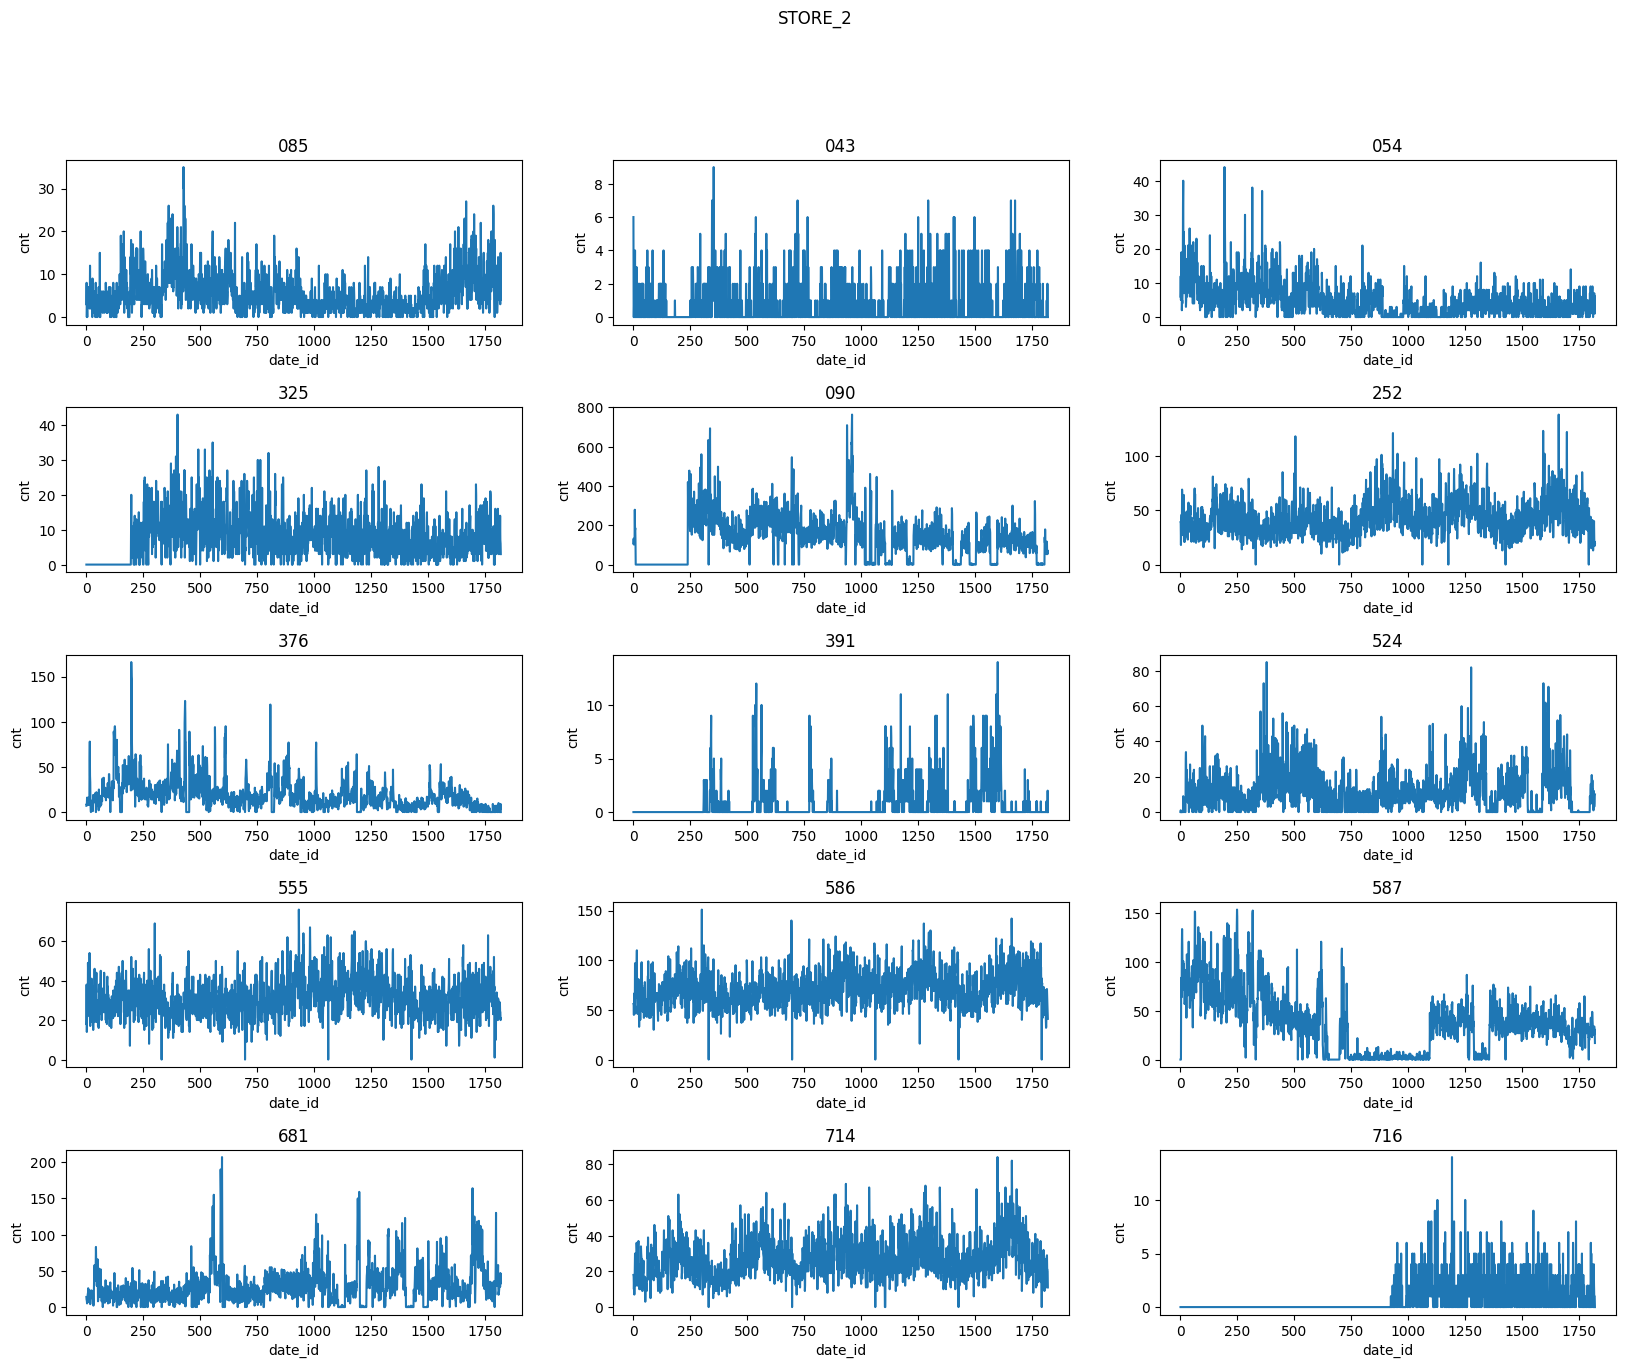

In [3]:
store_id = 'STORE_2'

fig,ax = plt.subplots(5, 3, figsize=(20, 15))

arts = data[data.store_id == store_id].item_id.unique()
for i, art in enumerate(arts):
    sns.lineplot(data=data[(data.item_id==art) & (data.store_id==store_id)],
                 x='date_id',
                 y='cnt',
                 ax = ax[i//3][i%3])
    ax[i // 3][i % 3].set_title(art.split('_')[-1])
plt.suptitle(store_id)
plt.subplots_adjust(hspace=0.5)

Распределение таргета

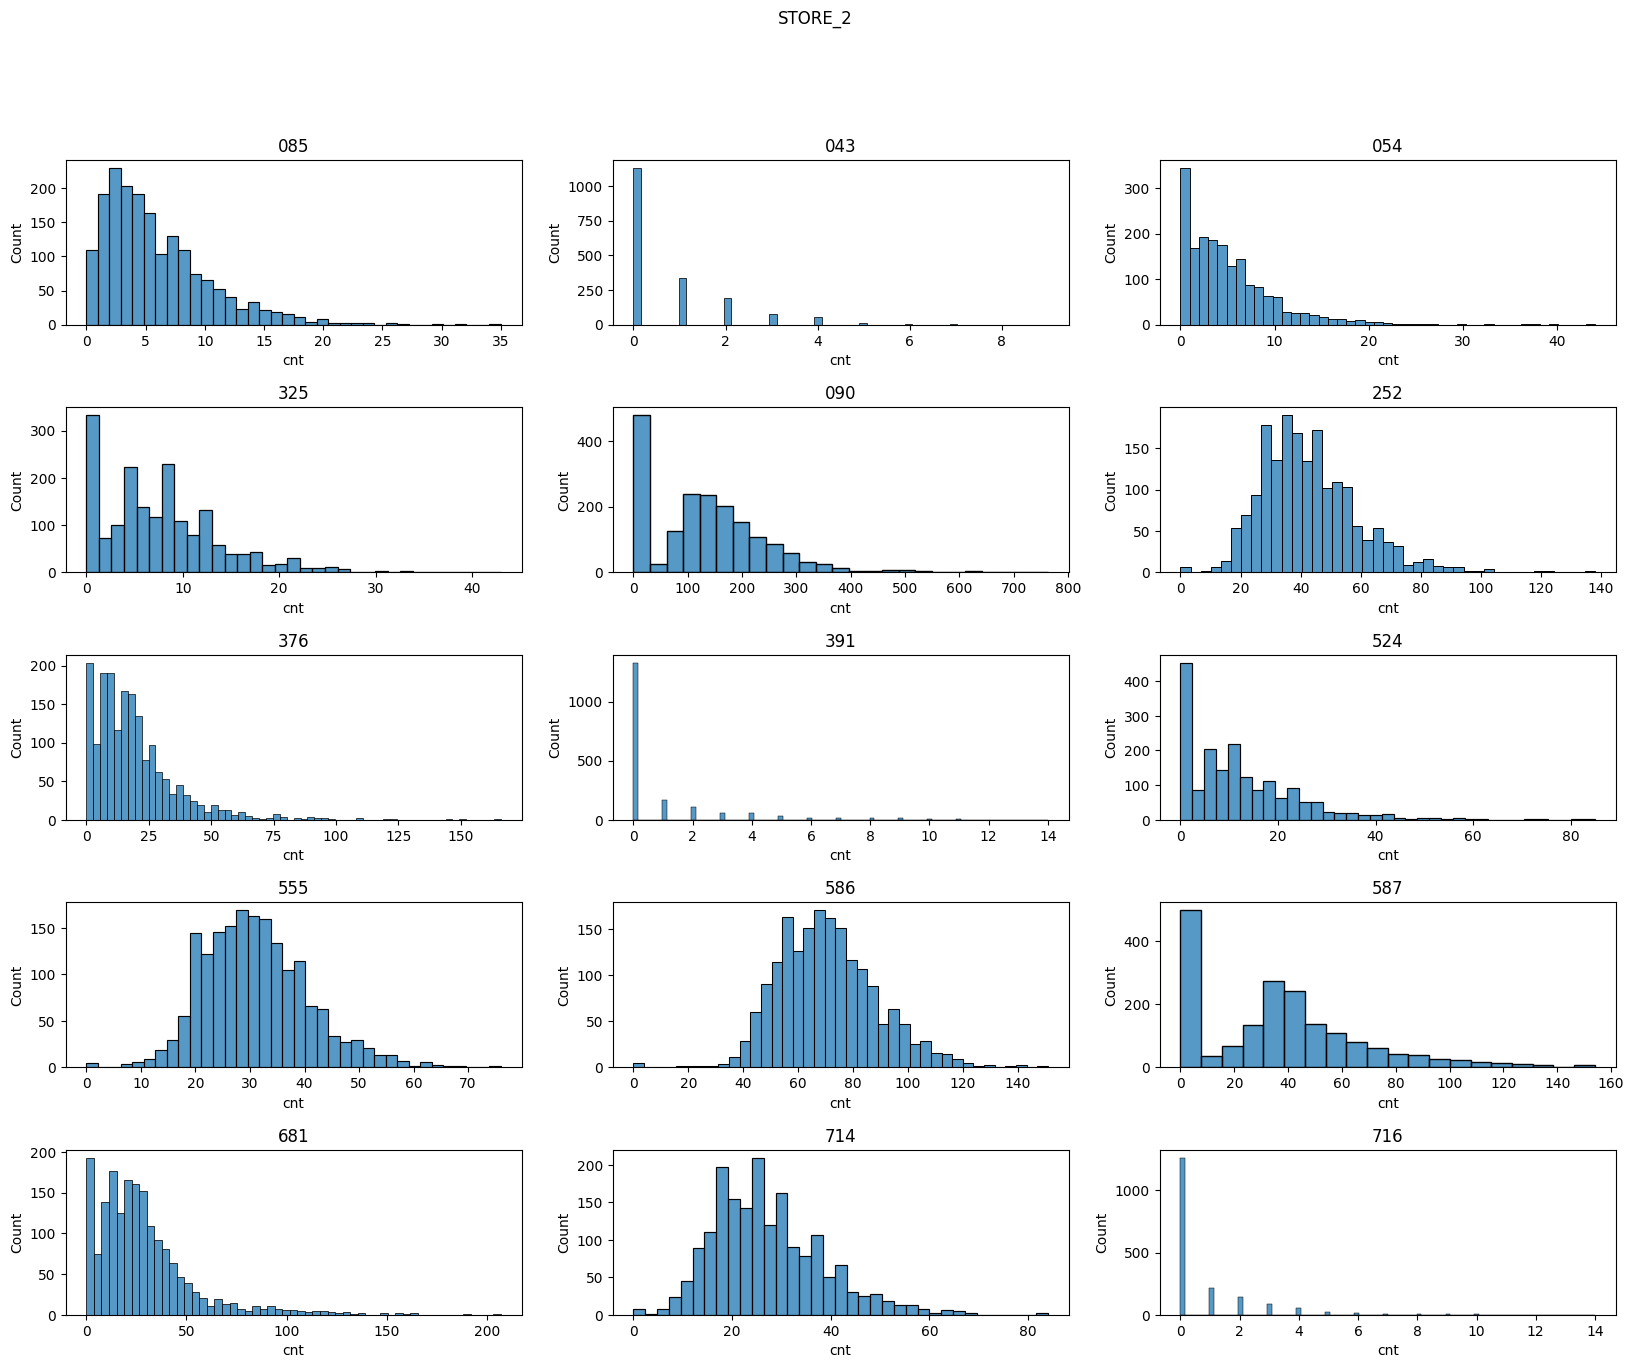

In [4]:
store_id = 'STORE_2'

fig,ax = plt.subplots(5, 3, figsize=(20, 15))

arts = data[data.store_id == store_id].item_id.unique()
for i, art in enumerate(arts):
    tmp = data[(data.item_id==art) & (data.store_id==store_id)].cnt.copy()
    sns.histplot(tmp, ax = ax[i//3][i%3])
    ax[i // 3][i % 3].set_title(art.split('_')[-1])
plt.suptitle(store_id)
plt.subplots_adjust(hspace=0.5)

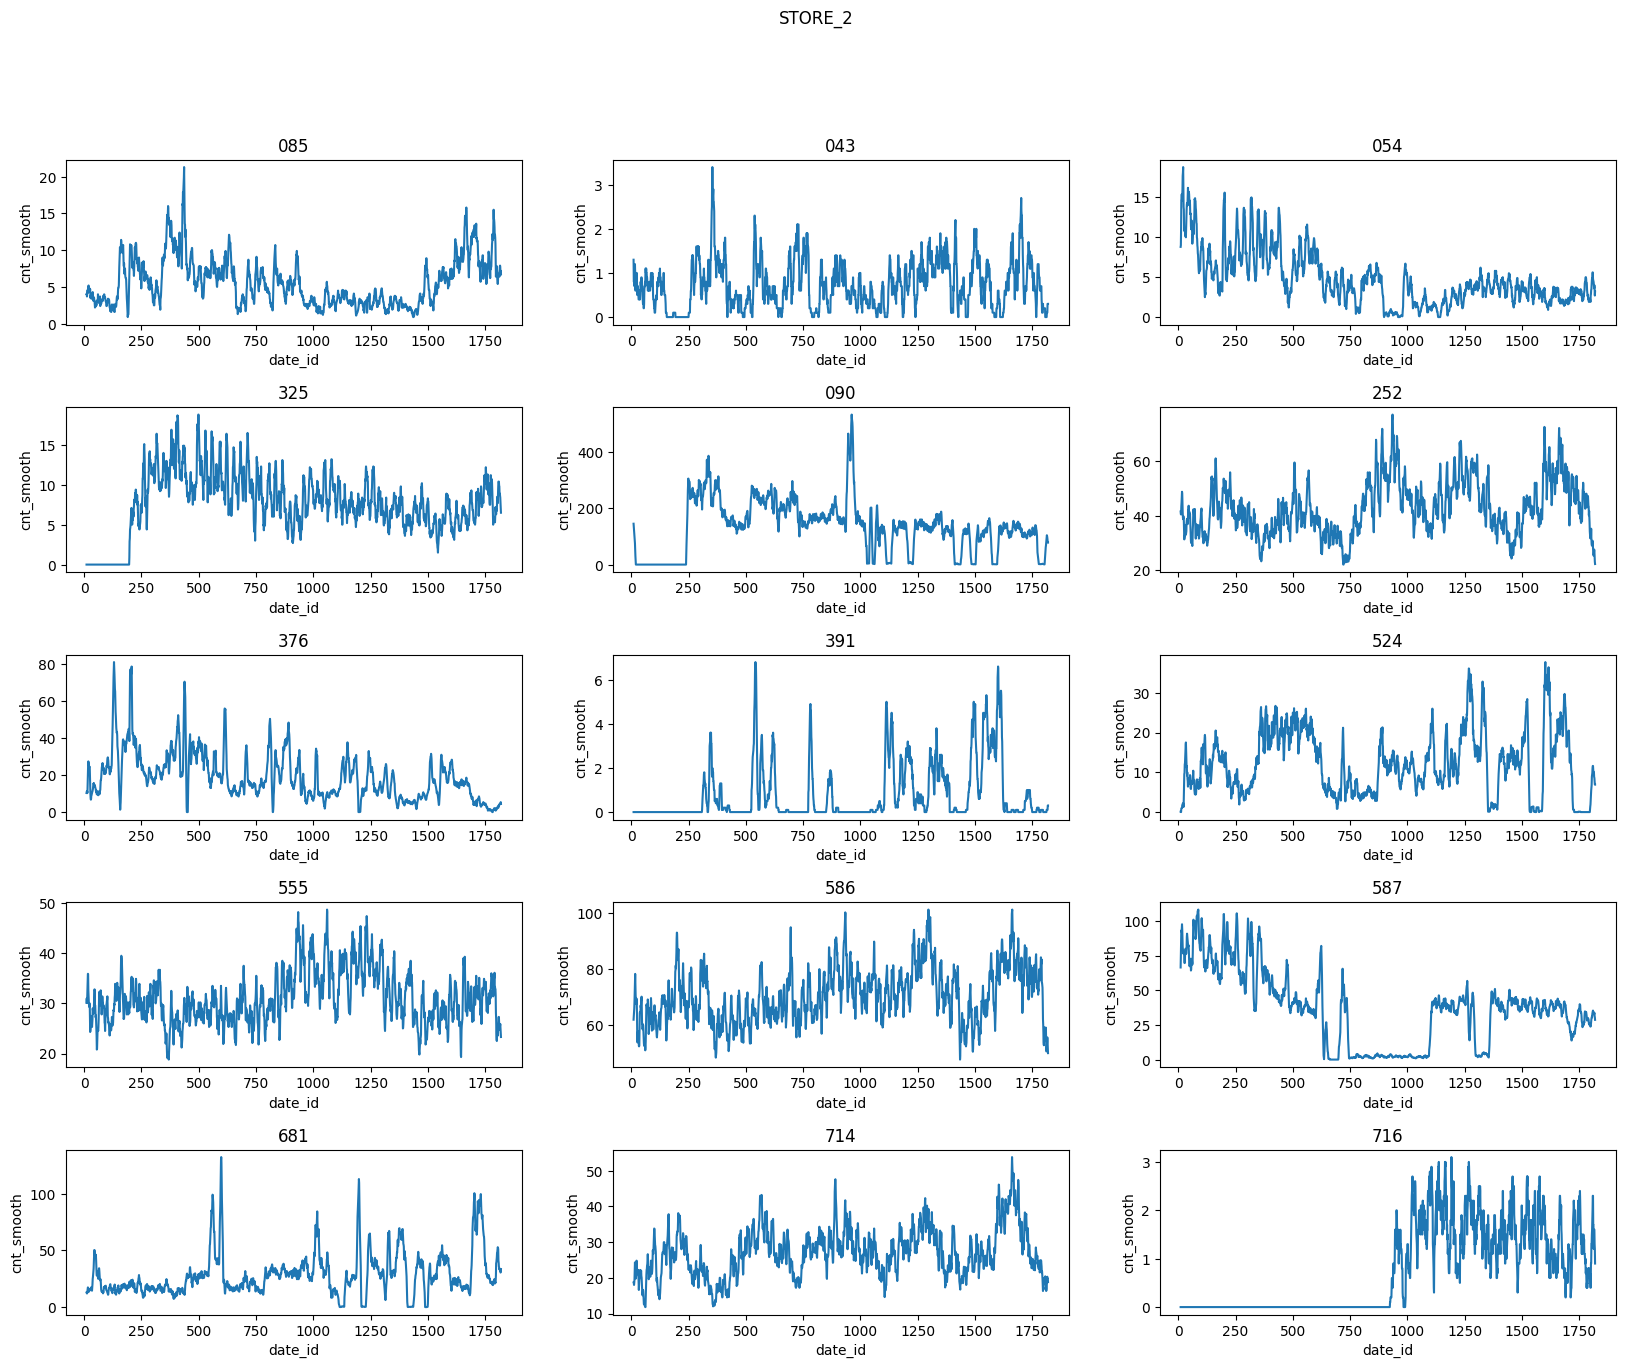

In [5]:
store_id = 'STORE_2'

fig,ax = plt.subplots(5, 3, figsize=(20, 15))

arts = data[data.store_id == store_id].item_id.unique()
for i, art in enumerate(arts):
    tmp = data[(data.item_id==art) & (data.store_id==store_id)].copy()
    tmp['cnt_smooth'] = tmp['cnt'].rolling(window=10).mean()
    sns.lineplot(data=tmp, x='date_id', y='cnt_smooth', ax = ax[i//3][i%3])
    ax[i // 3][i % 3].set_title(art.split('_')[-1])
plt.suptitle(store_id)
plt.subplots_adjust(hspace=0.5)

In [6]:
# from scipy.stats import boxcox

# store_id = 'STORE_2'

# fig,ax = plt.subplots(5, 3, figsize=(20, 15))

# arts = data[data.store_id == store_id].item_id.unique()
# for i, art in enumerate(arts):
#     tmp = data[(data.item_id==art) & (data.store_id==store_id)].copy()
#     tmp['boxcox_cnt'], lambda_ = boxcox(tmp['cnt'] + 3)
#     tmp['cnt_smooth'] = tmp['cnt'].rolling(window=10).mean()
#     sns.lineplot(data=tmp, x='date_id', y='boxcox_cnt', ax = ax[i//3][i%3])
#     ax[i // 3][i % 3].set_title(art.split('_')[-1] + f' lambda = {round(lambda_, 2)}')
# plt.suptitle(store_id + ' BOXCOX')
# plt.subplots_adjust(hspace=0.5)

In [7]:
# for i, art in enumerate(arts):
#     temp=data[(data.item_id==art) & (data.store_id==store_id)]
#     print(store_id, art.split('_')[-1])
#     print(temp.describe().to_string())

In [8]:
# data.isnull().sum()

In [9]:
art085=data[(data.item_id==store_id + '_085') & (data.store_id==store_id)]
art085.head(10)

,date,wm_yr_wk,weekday,wday,month,year,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3,item_id,store_id,cnt,sell_price
0,2011-01-29,11101,Saturday,1,1,2011,1,0,0,0,STORE_2_085,STORE_2,3,1.0
45,2011-01-30,11101,Sunday,2,1,2011,2,0,0,0,STORE_2_085,STORE_2,8,1.0
90,2011-01-31,11101,Monday,3,1,2011,3,0,0,0,STORE_2_085,STORE_2,0,1.0
135,2011-02-01,11101,Tuesday,4,2,2011,4,0,1,1,STORE_2_085,STORE_2,3,1.0
180,2011-02-02,11101,Wednesday,5,2,2011,5,1,1,0,STORE_2_085,STORE_2,0,1.0
225,2011-02-03,11101,Thursday,6,2,2011,6,1,1,1,STORE_2_085,STORE_2,7,1.0
270,2011-02-04,11101,Friday,7,2,2011,7,0,1,0,STORE_2_085,STORE_2,4,1.0
315,2011-02-05,11102,Saturday,1,2,2011,8,1,1,1,STORE_2_085,STORE_2,5,1.0
360,2011-02-06,11102,Sunday,2,2,2011,9,1,1,1,STORE_2_085,STORE_2,3,1.0
405,2011-02-07,11102,Monday,3,2,2011,10,0,1,1,STORE_2_085,STORE_2,7,1.0


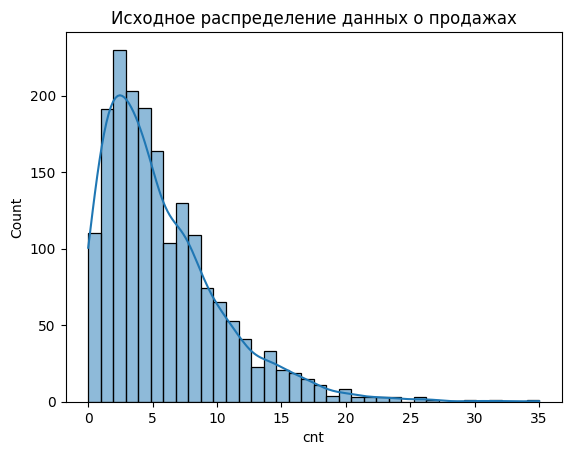

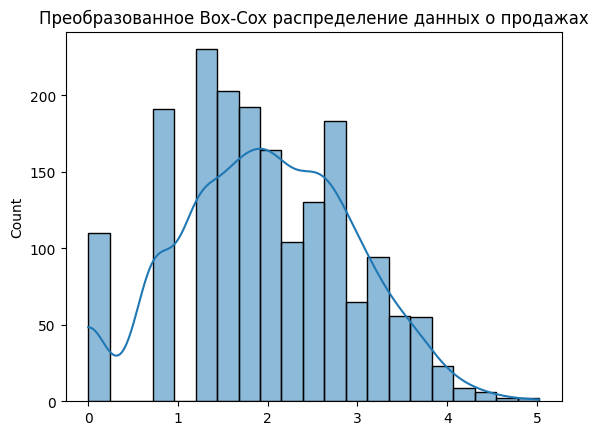

Значение λ (lambda): 0.17895780988924995
Оригинальные данные: [ 3  8  0 ...  3 15  4]
Обратные преобразованные данные: [ 3.  8.  0. ...  3. 15.  4.]


In [10]:
import numpy as np
from scipy import stats
from scipy import special
import matplotlib.pyplot as plt
import seaborn as sns

sales_data = art085.copy().cnt

sns.histplot(sales_data, kde=True)
plt.title("Исходное распределение данных о продажах")
plt.show()

transformed_data, lambda_value = stats.boxcox(sales_data + 1)  # +1, чтобы избежать нулевых значений

sns.histplot(transformed_data, kde=True)
plt.title("Преобразованное Box-Cox распределение данных о продажах")
plt.show()

print("Значение λ (lambda):", lambda_value)

inverse_transformed_data = special.inv_boxcox(
    transformed_data, lambda_value) - 1

print("Оригинальные данные:", sales_data.values)
print("Обратные преобразованные данные:", inverse_transformed_data)

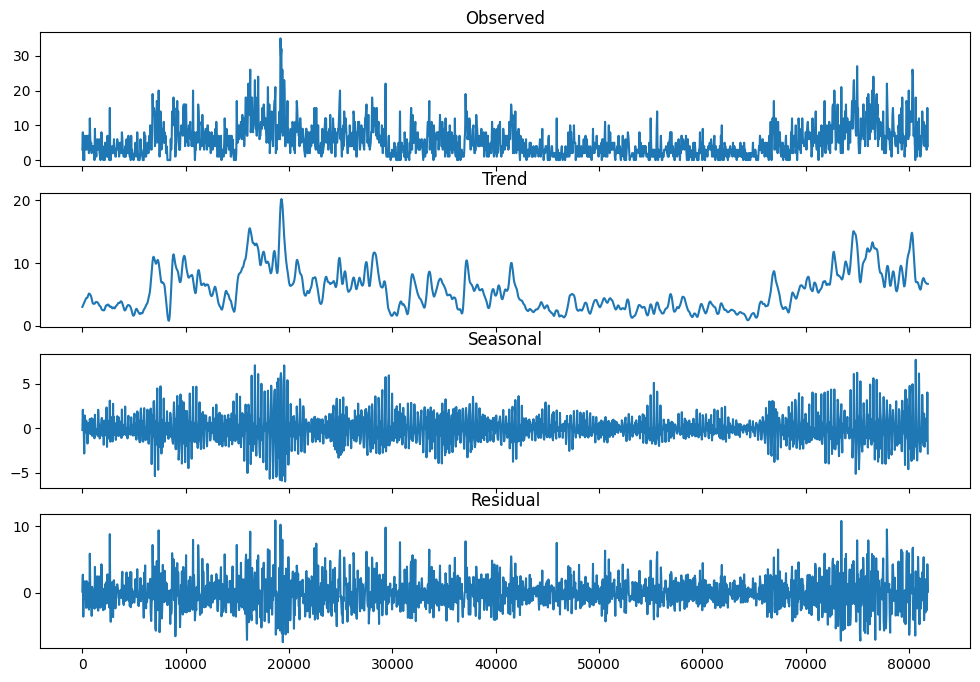

In [44]:
from statsmodels.tsa.seasonal import STL

stl = STL(art085['cnt'], period=7, )
result = stl.fit()

# Визуализация компонентов
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')
# plt.tight_layout()
plt.show()

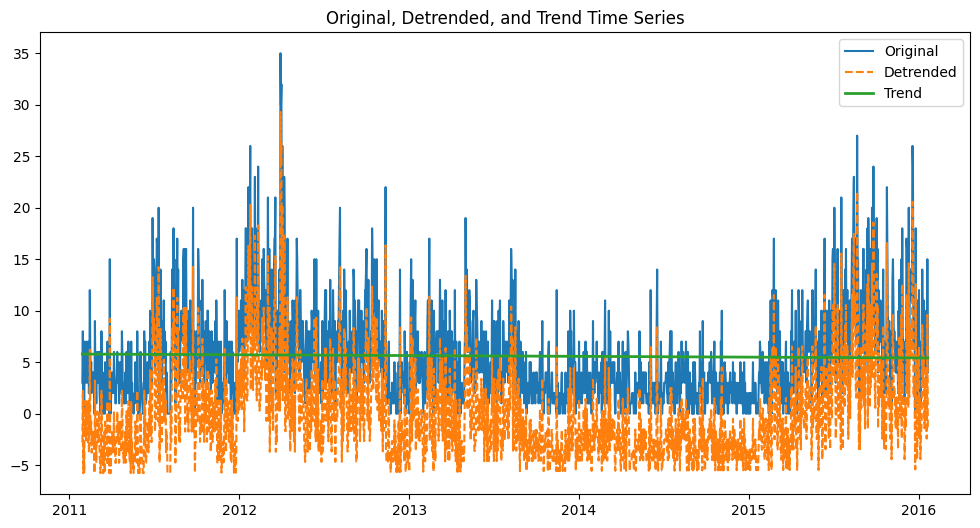

In [12]:
from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster

# Загрузка данных
data = art085.copy()
data.set_index('date', inplace=True)

# Определение модели тренда (полиномиальная степень 1 - линейный тренд)
trend_forecaster = PolynomialTrendForecaster(degree=1)

# Создание объекта Detrender с указанным тренд-форкастером
detrender = Detrender(forecaster=trend_forecaster)

# Применение детрендинга к данным
detrended = detrender.fit_transform(data['cnt'])

# Подгонка тренд-форкастера для получения тренда
trend_forecaster.fit(data['cnt'])
trend = trend_forecaster.predict(fh=data.index)

# Визуализация исходного, детрендированного ряда и тренда
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['cnt'], label='Original')
plt.plot(data.index, detrended, label='Detrended', linestyle='--')
plt.plot(data.index, trend, label='Trend', linewidth=2)
plt.legend()
plt.title('Original, Detrended, and Trend Time Series')
plt.show()

In [13]:
detrended.head()

date
2011-01-29   -2.790063
2011-01-30    2.210147
2011-01-31   -5.789644
2011-02-01   -2.789435
2011-02-02   -5.789225
Name: cnt, dtype: float64

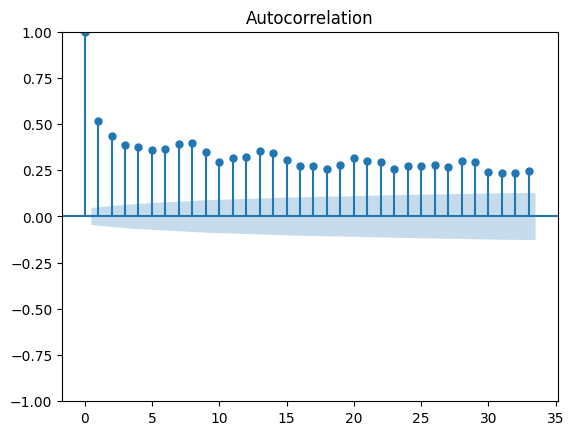

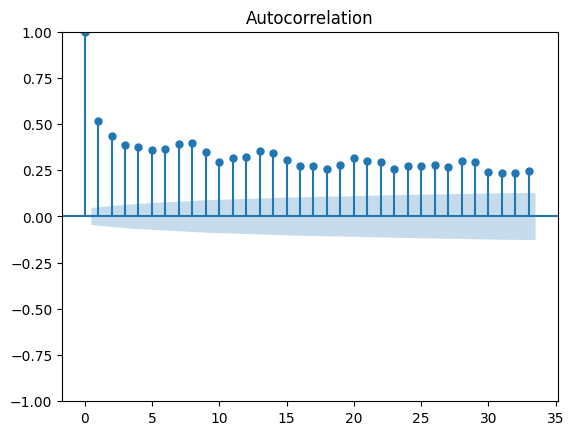

In [14]:
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(detrended, )